In [1]:
%pwd

'/Users/schang/Projects/STAT/IS5/exercise/ch04'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import seaborn as sns

In [3]:
datafile = '../../dataset/ch04/load_factors_2016.txt'
load_factors = pd.read_csv(datafile, sep='\t')

In [4]:
load_factors.head()

,Year,Month,Domestic,International,Total,Decimal_Time
0,2000,1,61.97,66.63,64.07,2000.08333
1,2000,2,66.20,67.12,66.61,2000.16667
2,2000,3,73.19,75.63,74.26,2000.25000
3,2000,4,73.02,75.18,74.00,2000.33333
4,2000,5,73.25,76.10,74.55,2000.41667


In [5]:
load_factors.columns

Index(['Year', 'Month', 'Domestic', 'International', 'Total', 'Decimal_Time'], dtype='object')

In [6]:
dostic = load_factors["Domestic"]
intrl = load_factors["International"]

In [8]:
print(f'Sample size: {len(load_factors)}')

Sample size: 197


In [9]:
print(f'{dostic.isna().sum()} data missing in Domestic')

0 data missing in Domestic


In [10]:
print(f'{intrl.isna().sum()} data missing in International')

0 data missing in International


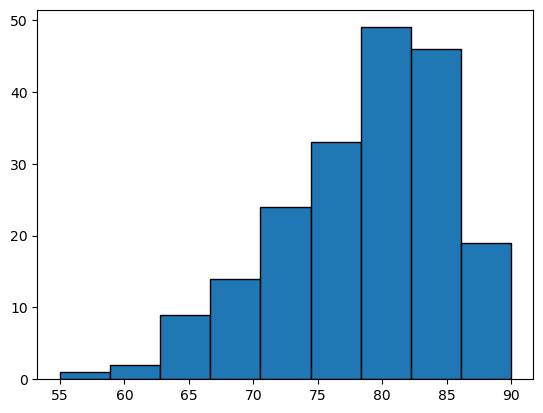

In [11]:
plt.hist(dostic, bins=np.linspace(55, 90, 10), edgecolor='black');

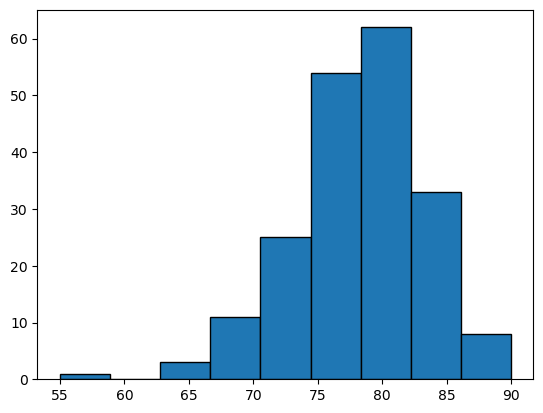

In [12]:
plt.hist(intrl, bins=np.linspace(55, 90, 10), edgecolor='black');

In [13]:
def iqr(data):
    q75, q25 = np.percentile(data, [75, 25])
    return q75, q25, q75-q25

In [14]:
d_q75, d_q25, dostic_iqr = iqr(dostic)
i_q75, i_q25, intrl_iqr = iqr(intrl)

summary_of_domestic_international= pd.DataFrame(
data={
    'Mean': [round(stat.mean(dostic), 4),
             round(stat.mean(intrl), 4)
            ],
    
    'Median':[round(stat.median(dostic), 2),
              round(stat.median(intrl), 2)
            ],
    'StdDev':[round(stat.stdev(dostic), 4),
              round(stat.stdev(intrl), 4)
            ],
    'IQR': [round(dostic_iqr, 2),
           round(intrl_iqr, 2)
           ],
    
    'n': [ len(dostic),
           len(intrl)  
         ],
    'Missing': [dostic.isna().sum(),
                intrl.isna().sum()]
    },
    index=['Domestic', 'International']
)
summary_of_domestic_international

,Mean,Median,StdDev,IQR,n,Missing
Domestic,78.4802,80.07,6.4982,9.35,197,0
International,78.1434,78.86,5.0225,6.18,197,0


### Compare and contrast the distributions

* Shape: both distributions are unimodal, left skewed, without obvious outliers.

* Center: both distributions are centered around 78% as load factor measured in mean value (or 79-80% by median). Note: we cannot say the centers are different, because the difference may not be singnificant enough.  It may be due to randomness and sampling error.

* Spread: the domestic flights appear to have wider spread than the international flights
